In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline


In [6]:
df = pd.read_csv('Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.drop('customerID', axis='columns', inplace=True)

In [8]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
pd.to_numeric(df.TotalCharges, errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
df.shape

(7043, 20)

In [12]:
df1 = df[df.TotalCharges != ' ']
df1.shape

(7032, 20)

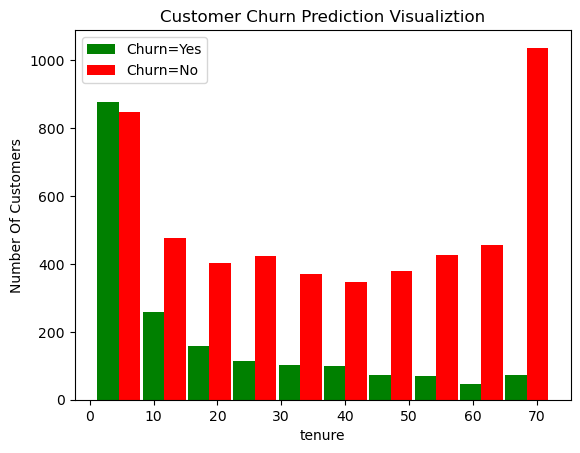

In [13]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

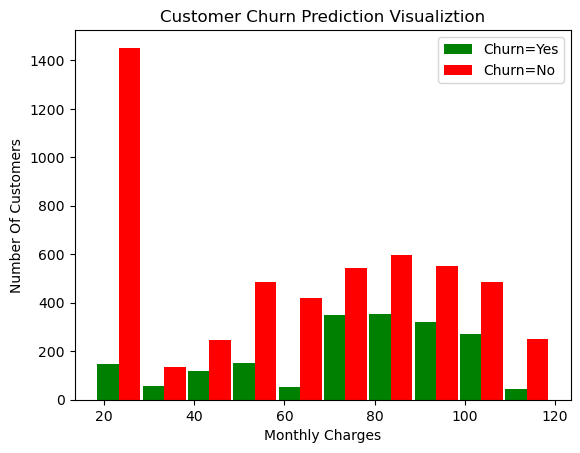

In [14]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

blood_sugar_men = [113, 85, 90, 150, 149, 88, 93, 115, 135, 80, 77, 82, 129]
blood_sugar_women = [67, 98, 89, 120, 133, 150, 84, 69, 89, 79, 120, 112, 100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [15]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [16]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [17]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

/var/folders/q6/b9hy2b853mgbskhvzkjkqvg40000gn/T/ipykernel_78311/2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
/var/folders/q6/b9hy2b853mgbskhvzkjkqvg40000gn/T/ipykernel_78311/2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [18]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


In [19]:
# Convert Yes and No to 1 or 0
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

/var/folders/q6/b9hy2b853mgbskhvzkjkqvg40000gn/T/ipykernel_78311/1661631988.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes': 1,'No': 0},inplace=True)


In [20]:
for col in df1:
    print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: [0 1]


In [21]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

/var/folders/q6/b9hy2b853mgbskhvzkjkqvg40000gn/T/ipykernel_78311/698335744.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace=True)


In [22]:
df1.gender.unique()

array([1, 0])

In [23]:
# One hot encoding for categorical columns
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'], dtype='uint8')
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [24]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [25]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                                object
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [26]:
col_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[col_to_scale] = scaler.fit_transform(df2[col_to_scale])

In [27]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [28]:
X = df2.drop('Churn', axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [29]:
X_train.shape

(5625, 26)

In [30]:
X_test.shape

(1407, 26)

In [31]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7379 - loss: 0.5312
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.7891 - loss: 0.4299
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.7987 - loss: 0.4282
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 368us/step - accuracy: 0.8056 - loss: 0.4180
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.8092 - loss: 0.4035
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - accuracy: 0.8080 - loss: 0.4037
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.8093 - loss: 0.4065
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - accuracy: 0.8080 - loss: 0.4081
Epoch 9/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.8102 - loss: 0.4104
Epoch 10/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.8163 - loss: 0.4012


In [32]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.7885 - loss: 0.4410


[0.45008260011672974, 0.7796730399131775]

In [33]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


array([[0.21353428],
       [0.3238699 ],
       [0.00560256],
       [0.71226305],
       [0.35641202]], dtype=float32)

In [34]:
y_test[:5]

2660    0
744     0
5579    1
64      1
3287    1
Name: Churn, dtype: int64

In [35]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [36]:
y_pred[:5]

[0, 0, 0, 1, 0]

In [37]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.67      0.48      0.56       408

    accuracy                           0.78      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

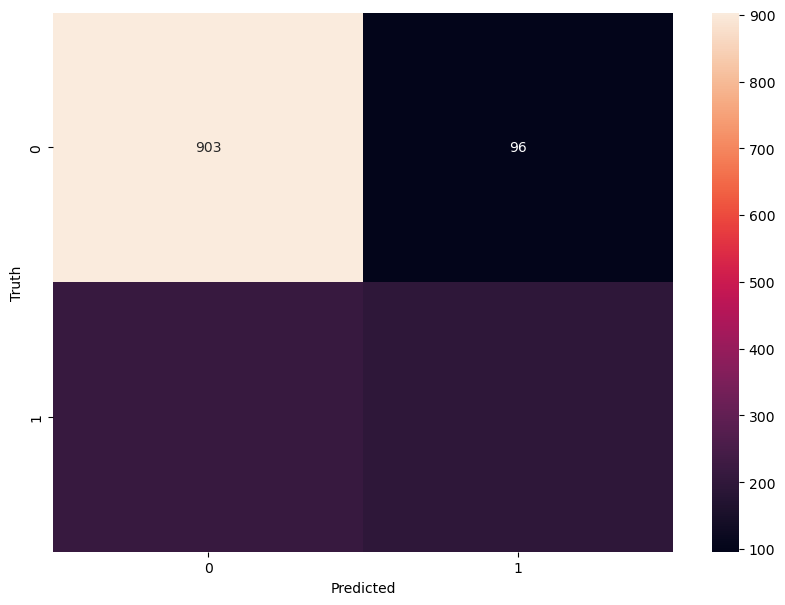

In [38]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
# Accuracy

round((862+229)/(862+229+137+179),2)

0.78

In [40]:
# Precisiion

round(862/(862+179),2)

0.83

In [41]:
# Precision for 0 class. i.e. Precision for customers who did not churn

round(862/(862+179),2)

0.83

In [42]:
# Precision for 1 class. i.e. Precision for customers who actually churned

round(229/(229+137),2)

0.63

In [43]:
# Recall for 0 class

round(862/(862+137),2)

0.86

In [44]:
# Recall for 0 class

round(229/(229+179),2)

0.56

In [45]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [46]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [47]:

y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.7268 - loss: 0.5755
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.7890 - loss: 0.4327
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.7935 - loss: 0.4271
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.7919 - loss: 0.4338
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8065 - loss: 0.4098
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.8097 - loss: 0.4033
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 406us/step - accuracy: 0.8085 - loss: 0.4028
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8109 - loss: 0.3996
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 391us/step - accuracy: 0.8092 - loss: 0.3990
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.7995 - loss: 0.4055
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8075 - loss: 0.4079
Epoch 12/100
176/176 ━━━━━━━━━━


### Mitigating Skewdness of Data
### Method 1: Undersampling
reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [48]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [49]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
Churn
0    1869
1    1869
Name: count, dtype: int64


In [50]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [51]:
# Number of classes in training Data
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [52]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 535us/step - accuracy: 0.6080 - loss: 0.6577 
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.7507 - loss: 0.5285
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7652 - loss: 0.4990
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.7635 - loss: 0.4980
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 432us/step - accuracy: 0.7705 - loss: 0.4869
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7701 - loss: 0.4902
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7712 - loss: 0.4815
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.7724 - loss: 0.4715
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step - accuracy: 0.7651 - loss: 0.4895
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.7737 - loss: 0.4713
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 434us/step - accuracy: 0.7749 - loss: 0.4773
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/ste

### Method2: Oversampling

In [53]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
Churn
0    5163
1    5163
Name: count, dtype: int64


In [54]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [55]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [56]:
loss = keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.6743 - loss: 0.6041
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.7658 - loss: 0.4912
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.7606 - loss: 0.4904
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 411us/step - accuracy: 0.7729 - loss: 0.4786
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.7664 - loss: 0.4719
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.7807 - loss: 0.4625
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.7793 - loss: 0.4611
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.7849 - loss: 0.4540
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 439us/step - accuracy: 0.7706 - loss: 0.4682
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - accuracy: 0.7927 - loss: 0.4444
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.7883 - loss: 0.4471
Epoch 12/100
259/259 ━━━━━━━━━━

### Method3: SMOTE

In [57]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [68]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)


In [71]:
# Number of classes in training Data
y_train.value_counts()

Churn
1    4130
0    4130
Name: count, dtype: int64

In [72]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.6984 - loss: 0.5940
Epoch 2/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.7752 - loss: 0.4698
Epoch 3/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step - accuracy: 0.7791 - loss: 0.4600
Epoch 4/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 377us/step - accuracy: 0.7818 - loss: 0.4557
Epoch 5/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.7882 - loss: 0.4472
Epoch 6/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.7936 - loss: 0.4442
Epoch 7/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.7959 - loss: 0.4382
Epoch 8/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.8047 - loss: 0.4245
Epoch 9/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8024 - loss: 0.4316
Epoch 10/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8000 - loss: 0.4345
Epoch 11/100
259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8110 - loss: 0.4155
Epoch 12/100
259/259 ━━━━━━━━━━

###  Method4: Use of Ensemble with undersampling

In [73]:
df2.Churn.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [74]:
# Regain Original features and labels
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [76]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [77]:
df3 = X_train.copy()
df3['Churn'] = y_train

In [78]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [84]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [86]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train 

In [88]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.5550 - loss: 0.6796 
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - accuracy: 0.7597 - loss: 0.5287
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7618 - loss: 0.4916
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - accuracy: 0.7631 - loss: 0.4891
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.7723 - loss: 0.4732
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.7734 - loss: 0.4731
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.7712 - loss: 0.4847
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 478us/step - accuracy: 0.7763 - loss: 0.4694
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step - accuracy: 0.7725 - loss: 0.4823
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.7601 - loss: 0.4914
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.7760 - loss: 0.4583
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 424us/ste

In [89]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.6347 - loss: 0.6608 
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.7683 - loss: 0.5112
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.7621 - loss: 0.4956
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.7573 - loss: 0.4954
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - accuracy: 0.7664 - loss: 0.4820
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.7762 - loss: 0.4742
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 410us/step - accuracy: 0.7704 - loss: 0.4800
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 409us/step - accuracy: 0.7772 - loss: 0.4647
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 444us/step - accuracy: 0.7651 - loss: 0.4857
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 502us/step - accuracy: 0.7774 - loss: 0.4691
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 514us/step - accuracy: 0.7801 - loss: 0.4493
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/ste

In [90]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - accuracy: 0.6722 - loss: 0.6388 
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.7557 - loss: 0.5254
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 431us/step - accuracy: 0.7724 - loss: 0.4783
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.7708 - loss: 0.4863
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.7919 - loss: 0.4718
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.7812 - loss: 0.4642
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.7737 - loss: 0.4854
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 448us/step - accuracy: 0.7838 - loss: 0.4637
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 427us/step - accuracy: 0.7802 - loss: 0.4691
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - accuracy: 0.7825 - loss: 0.4683
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 489us/step - accuracy: 0.7868 - loss: 0.4494
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/ste

In [91]:
len(y_pred1)

1407

In [92]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

In [93]:
cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1033
           1       0.48      0.75      0.59       374

    accuracy                           0.72      1407
   macro avg       0.68      0.73      0.69      1407
weighted avg       0.78      0.72      0.73      1407

